In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [43]:
#importing the necessary packages 

import numpy as np
import pandas as pd
import os 
from PIL import Image
import matplotlib.pyplot as plt

import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [44]:
# setting up the data paths

base_dir = '' # base directory  
train_dir = os.path.join(base_dir,'C:/Users/lurpd/Documents/Development/Datasets/DistractedDriverSet/imgs/train/')              # train directory

In [45]:
class_def = {
    'c0': 'Safe driving', 
    'c1': 'Distracted',
    'c2': 'Tired', 
}


In [ ]:
#add random letterboxing to trainng 
import numpy as np
from PIL import Image

def random_letterbox(img_array):
    #convert numpy array back to PIL for easier manipulation    
    if img_array.ndim == 3 and img_array.shape[-1] == 1:
        img_array = np.squeeze(img_array, axis=-1)

    img = Image.fromarray(np.uint8(img_array))
    target_size = (128, 128)
    
    #random scale factor 
    scale = np.random.uniform(0.8, 1.0)
    
    new_w = int(target_size[0] * scale)
    new_h = int(target_size[1] * scale)
    
    img = img.resize((new_w, new_h), Image.Resampling.LANCZOS)
    
    #black background
    background = Image.new("L", target_size, 0)
    
    #center in the frame
    x_offset = (target_size[0] - new_w) // 2
    y_offset = (target_size[1] - new_h) // 2
    
    background.paste(img, (x_offset, y_offset))
    
    #convert back to numpy float array
    arr = np.array(background).astype(np.float32)
    arr = np.expand_dims(arr, axis=-1)
    return arr / 255.0


In [48]:
image_size = (128,128)  # image shape
batch_size = 32
val_size = 0.2

train_data_gen = ImageDataGenerator(validation_split= val_size, preprocessing_function=random_letterbox, horizontal_flip=True)
test_data_gen = ImageDataGenerator(preprocessing_function=random_letterbox)

In [49]:
# defining the training parameters


train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     batch_size = batch_size,
                                                     seed=42, 
                                                     shuffle=True,
                                                     subset='training',
                                                     color_mode='grayscale')

val_generator =  train_data_gen.flow_from_directory(train_dir,
                                               target_size = image_size,
                                               batch_size = batch_size,
                                               seed=42, 
                                               shuffle=True,
                                               subset='validation',
                                               color_mode='grayscale')



Found 31436 images belonging to 3 classes.
Found 7857 images belonging to 3 classes.


In [50]:
import collections

class_counts = collections.Counter(train_generator.classes)
for cls, count in class_counts.items():
    print(f"{cls} ({list(train_generator.class_indices.keys())[cls]}): {count}")

0 (c0): 7446
1 (c1): 21828
2 (c2): 2162


(32, 128, 128, 1)
(32, 3)
(32, 128, 128, 1) 0.0 1.0


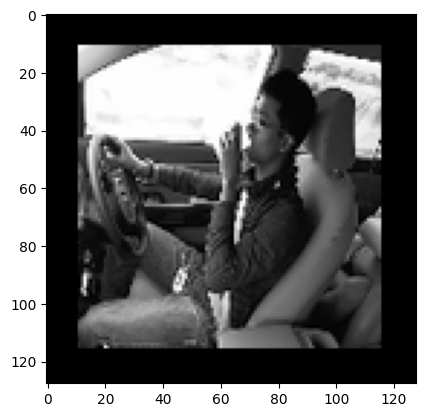

In [51]:
for data_batch,label_batch in train_generator:
    print(data_batch.shape)   # train batch
    print(label_batch.shape)  # label batch
    break

batch_x, batch_y = next(train_generator)
print(batch_x.shape, batch_x.min(), batch_x.max())
plt.imshow(batch_x[0].squeeze(), cmap='gray')
plt.show()

In [52]:
from keras.layers import Dropout

model = Sequential()                                                  # creating a sequential model
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1))) # taking units of 32 and filter of 3x3
model.add(MaxPooling2D(2,2))                                          # maxpool layer with 2x2 filter   
model.add(Dropout(0.25))                                              #dropout 
model.add(Conv2D(64,(3,3),activation='relu'))                         # taking units of 64 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))                        # taking units of 128 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))                        # taking units of 256 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))                        # taking units of 512 and filter of 3x3
model.add(MaxPooling2D(2,2))    
model.add(Flatten())                                                  # flattening the data to feed into to Dense layer
model.add(Dense(1024,activation='relu'))                              # taking units of 1024
model.add(Dense(512,activation='relu'))                               # taking units of 512 
model.add(Dense(128,activation='relu'))                               # taking units of 128
model.add(Dropout(0.5))                                               #final dropout
num_classes = train_generator.num_classes
model.add(Dense(num_classes, activation='softmax'))                           # output later with units of 10 since 10 labels

model.summary() # to print summary of model architecture

c:\Users\lurpd\Documents\Development\DistractionAI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257,027 (16.24 MB)

 Trainable params: 4,257,027 (16.24 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
#autocalculate class weight

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import collections

class_counts = collections.Counter(train_generator.classes)

print("\nImage count per class:")
for class_index, count in sorted(class_counts.items()):
    class_name = list(train_generator.class_indices.keys())[class_index]
    print(f"  {class_index} ({class_name}): {count} images")

class_indices = train_generator.class_indices
num_classes = len(class_indices)
class_labels = np.unique(train_generator.classes)

weights = compute_class_weight(
    class_weight="balanced",
    classes=class_labels,
    y=train_generator.classes
)

class_weights = dict(enumerate(weights))

#print to make sure
print("\nAuto-calculated class weights:")
for i, w in class_weights.items():
    class_name = list(class_indices.keys())[i]
    print(f"  {i} ({class_name}): {w:.3f}")

# manual weights just in case
class_weights = {
    0: 1.2,  #Safe driving
    1: 0.8,  #distracted
    2: 2.0,  #tired
}


Image count per class:
  0 (c0): 7446 images
  1 (c1): 21828 images
  2 (c2): 2162 images

Auto-calculated class weights:
  0 (c0): 1.407
  1 (c1): 0.480
  2 (c2): 4.847


In [55]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weights
)

Epoch 1/10


c:\Users\lurpd\Documents\Development\DistractionAI\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


983/983 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - accuracy: 0.8099 - loss: 0.5341 - val_accuracy: 0.5603 - val_loss: 1.7430
Epoch 2/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 72s 74ms/step - accuracy: 0.8890 - loss: 0.3004 - val_accuracy: 0.6100 - val_loss: 1.9080
Epoch 3/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 74s 75ms/step - accuracy: 0.9243 - loss: 0.2259 - val_accuracy: 0.6401 - val_loss: 2.2978
Epoch 4/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9421 - loss: 0.1864 - val_accuracy: 0.6566 - val_loss: 2.3762
Epoch 5/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9499 - loss: 0.1672 - val_accuracy: 0.6236 - val_loss: 1.9984
Epoch 6/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9565 - loss: 0.1491 - val_accuracy: 0.6494 - val_loss: 2.8896
Epoch 7/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.9612 - loss: 0.1366 - val_accuracy: 0.6357 - val_loss: 2.8506
Epoch 8/10
983/983 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.9640 - loss: 0.1270 - val_accurac

In [56]:
model.save("distracted_driver_detection.keras")

In [57]:
tr_loss = history.history['loss']
tr_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

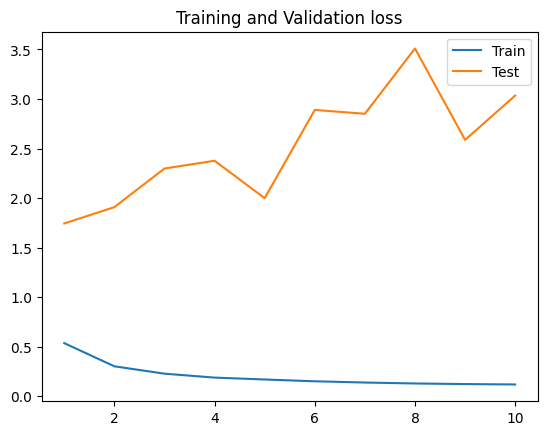

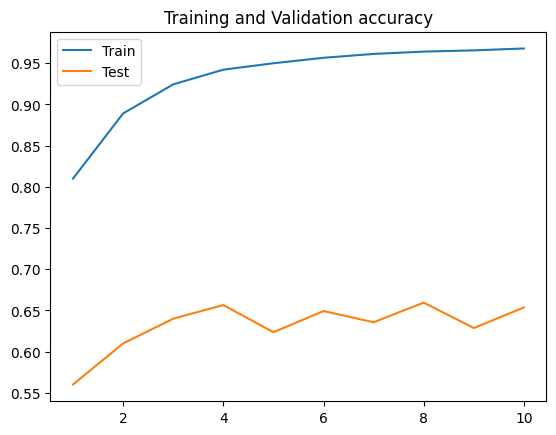

In [58]:
epchs = list(range(1,len(tr_loss)+1))
plt.plot(epchs,tr_loss,label='Train')
plt.plot(epchs,val_loss,label='Test')
plt.title("Training and Validation loss")
plt.legend()
plt.show()


plt.plot(epchs,tr_accuracy,label='Train')
plt.plot(epchs,val_accuracy,label='Test')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()